# ch1 hands on machine learning

In [105]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [45]:
oecd_bli= pd.read_csv('datasets/oecd_bli_2015.csv')

In [11]:
gdp_per_capita=pd.read_csv('datasets/gdp_per_capita.csv')

In [16]:
pd.merge(oecd_bli[['Country','Value']],gdp_per_capita[['Country','2015']],on='Country')

,Country,Value,2015
0,Australia,1.100000,"50,961.87"
1,Australia,1.100000,"50,961.87"
2,Australia,1.100000,"50,961.87"
3,Australia,20.000000,"50,961.87"
4,Australia,20.000000,"50,961.87"
5,Australia,20.000000,"50,961.87"
6,Australia,2.300000,"50,961.87"
7,Australia,2.300000,"50,961.87"
8,Australia,2.300000,"50,961.87"
9,Australia,31588.000000,"50,961.87"


In [120]:
## extract rows which has Life satisfaction value of incicator and extract Country and Value columns.
oecd_extract=oecd_bli[(oecd_bli.Indicator=='Life satisfaction') & (oecd_bli.Inequality=='Total')][['Country','Value']]

## extract only Country and 2015 (gdp) columns
gdp_pc_extract=gdp_per_capita[['Country','2015']]

#merge two dataframes
merge_bli_gdp=pd.merge(oecd_extract,gdp_pc_extract,on='Country')

# change columns name resonably
merge_bli_gdp.columns=['Country','LS','GDP']

# GDP unit to float32
merge_bli_gdp.GDP=merge_bli_gdp.GDP.replace('[,]','', regex=True ).replace('\..+','', regex=True ).astype(float)
merge_bli_gdp[['LS','GDP']] = merge_bli_gdp[['LS','GDP']].apply(pd.to_numeric)

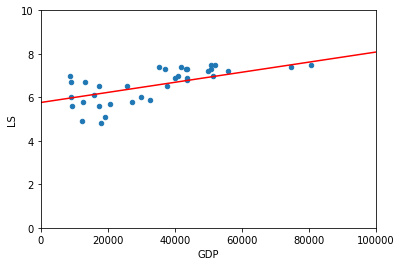

In [145]:
%matplotlib inline
ax=merge_bli_gdp.plot(kind='scatter',x='GDP',y='LS')
ax.set_ylim([0,10])
ax.set_xlim([0,100000])

# linear fit
model=linear_model.LinearRegression()
model.fit(merge_bli_gdp.GDP.values.reshape(-1,1),merge_bli_gdp.LS.values.reshape(-1,1))

# predict y from the data
x_new = np.linspace(0, 1000000 , 100000)
y_new = model.predict(x_new.reshape(-1,1))
ax.plot(x_new,y_new, color='red')

**Q1. How would you define Machine learning?**

make computer make algorithm automatically from data

**Q2. Can you name four types of problems where it shines?**

supervised, unsupervised, semisupervised, Reinforced

**Q3. What is a labeled traning set?**

datasets you already know the category

**Q4. what are the two most common supervised tasks?**

classification and regression

**Q5. Can you name four common unsupervised tasks?**

Clustering, Visualizaion, Dimensionality reduction and Association rule learning

** Q6.what type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?**

reinforcement learning

**Q7. what type of algorithm would you use to segment your customers into muliple groups?**

Clustering

**Q8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**

supervised

**Q9. what is an online learning system?**

training machine learning algorithm incrementaly 

**Q10. what is out-of-core learning?**

when datasets are hung that cannot fit in one machine's main memory

**Q11. What type of learning algorithm relies on a similarity measure to make prediction?**

instance based learning

**Q12. What is difference between a model parameter and a learning algorithms's hyperparameter?**

model parameter determines the model type, but hyperparameters determine how machine learning algorithms learn

**Q 13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?**

They make model that generalize data and can prediction // trying to find model whhich fit best to datasets // after making model, put new datapoint into the model, and get prediction

**Q 14. Can you name four of main challenges in Machine learning**

<font color='red'>Insufficient Quntity of Traning Data, Nonrepresentative Traning Data, poor-quality data and irrelevant features</font>

**Q 15. If your model performs great on the traning data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?**

Simplify the model(andrew Ng deny this way, rather he recommend to use regularization parameter, gather more traning data and reduce noise(fix data erros and remove outliers).

**Q 16. what is a test set and why would you want to use it?**

test set is for measuring how fitted model perform well about unseen datasets.

**Q 17. What is the purpose of a validation set?**

to check how model generalize training data

** Q18. What can go wrong if you tune hyperparameters using the test set?**

It can tend to fit only test set and doesn't gurantee about unseen data

**Q19. What is cross-validation and why would you prefer it to a validation set?**

It can reduce overfitting, especaily when having small traning dataset, samling bais could occur.